# Clustering - Kmeans
1. Simple walk through example
2. Analysing songs
3. Cluster Validation
4. Kmeans Limitations

# Lab Part 1. KMeans

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
# ------------------------------------------
# EXERCISE: Compute the centoid of the following data
#           [2, 5], [4, 4], [3, 3]
# ------------------------------------------

d = np.array([[2, 5], [4, 4], [3, 3]])
x, y = d.mean(axis=0)
x, y

(3.0, 4.0)

In [4]:
# Import iris data
iris = datasets.load_iris()
d = iris.data

np.random.seed(0)

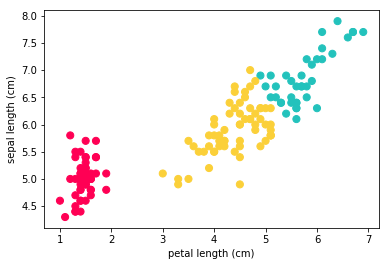

In [5]:
# Run KMeans using 3 clusters
est = KMeans(n_clusters=3, init='random')
est.fit(d)
y_kmeans = est.predict(d)

colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])

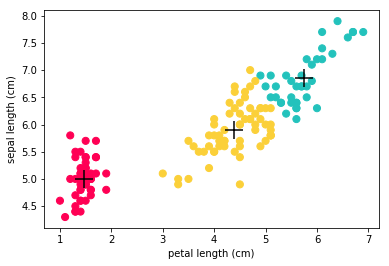

In [6]:
# ------------------------------------------
# Find the centers and plot them 
#     on the same graph.
# ------------------------------------------

centers = est.cluster_centers_
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])
plt.scatter(centers[:, 2], centers[:, 0], c='k', linewidths=3,
            marker='+', s=300)

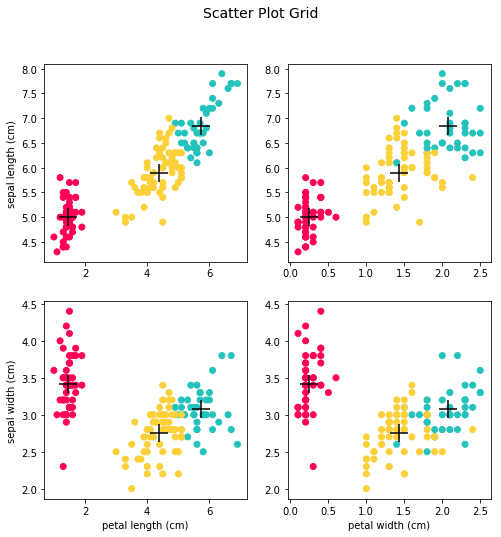

In [7]:
# Option #1: Scatter Plot Grid
plt.figure(figsize=(8, 8))
plt.suptitle('Scatter Plot Grid',  fontsize=14)
# Upper Left
plt.subplot(221)
plt.scatter(d[:,2], d[:,0], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[0])
plt.scatter(centers[:, 2], centers[:, 0], c='k', linewidths=3,
            marker='+', s=300)

# Upper Right
plt.subplot(222)
plt.scatter(d[:,3], d[:,0], c = colors[y_kmeans])
plt.scatter(centers[:, 3], centers[:, 0], c='k', linewidths=3,
            marker='+', s=300)

# Lower Left
plt.subplot(223)
plt.scatter(d[:,2], d[:,1], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[1])
plt.xlabel(iris.feature_names[2])
plt.scatter(centers[:, 2], centers[:, 1], c='k', linewidths=3,
            marker='+', s=300)

# Lower Right
plt.subplot(224)
plt.scatter(d[:,3], d[:,1], c = colors[y_kmeans])
plt.xlabel(iris.feature_names[3])
plt.scatter(centers[:, 3], centers[:, 1], c='k', linewidths=3,
            marker='+', s=300)

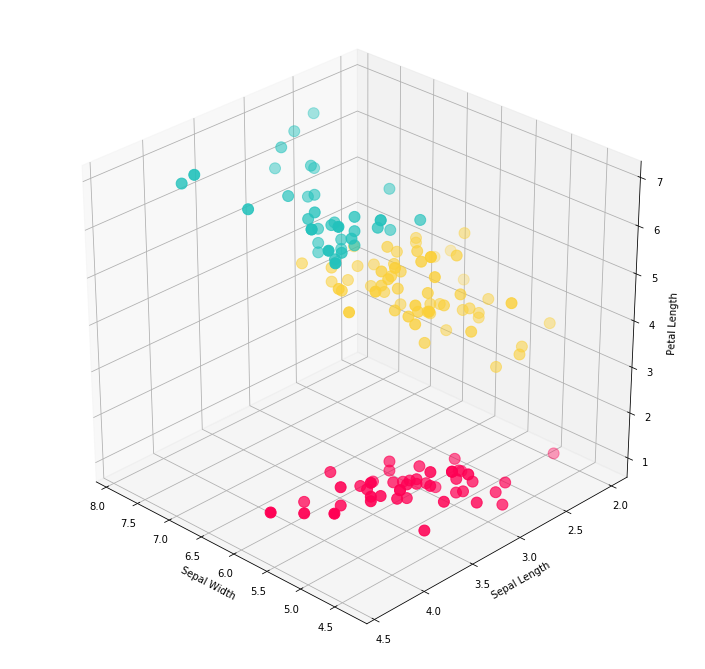

In [8]:
from mpl_toolkits.mplot3d import Axes3D
plt.suptitle('3d plot', fontsize=15)
ax = Axes3D(plt.figure(figsize=(10, 9)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(d[:,0], d[:,1], d[:,2], c = colors[y_kmeans], s=120)
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')

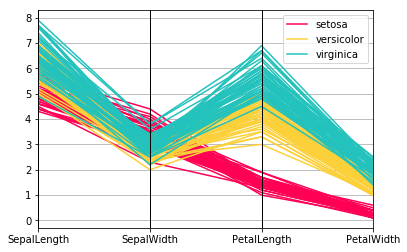

In [9]:
from pandas.tools.plotting import parallel_coordinates

features = [name[:-5].title().replace(' ', '') for name in iris.feature_names]
iris_df = pd.DataFrame(iris.data, columns = features)
iris_df['Name'] = iris.target_names[iris.target]
parallel_coordinates(frame=iris_df, class_column='Name', 
                     color=('#FF0054', '#FBD039', '#23C2BC'))


### Determining the number of clusters

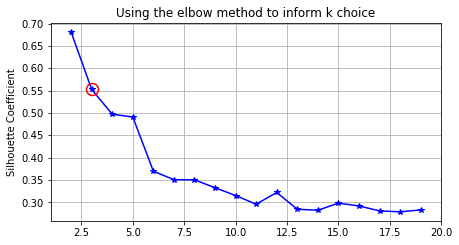

In [10]:
'''
DETERMINING THE NUMBER OF CLUSTERS
How do you choose k? There isn't a bright line, but we can evaluate 
performance metrics such as the silhouette coefficient and within sum of 
squared errors across values of k.

scikit-learn Clustering metrics documentation:
http://scikit-learn.org/stable/modules/classes.html#clustering-metrics
'''

# Create a bunch of different models
k_rng = range(1,20)
est = [KMeans(n_clusters = k).fit(d) for k in k_rng]

#================================
# Option 1: Silhouette Coefficient
# Generally want SC to be closer to 1, while also minimizing k

from sklearn import metrics
silhouette_scores = [metrics.silhouette_score(d, e.labels_, metric='euclidean') for e in est[1:]]

silhouette_scores

# Plot the results
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to inform k choice')
plt.plot(k_rng[1:], silhouette_scores, 'b*-')
plt.xlim([1,20])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.plot(3,silhouette_scores[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


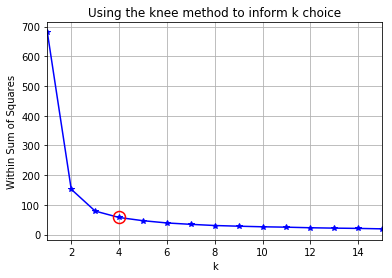

In [11]:
# Option 2: Within Sum of Squares (a.k.a., inertia)
# Generally want to minimize WSS, while also minimizing k

within_sum_squares = [e.inertia_ for e in est]

within_sum_squares


# Plot the results
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Using the knee method to inform k choice')
plt.xlabel('k')
plt.ylabel('Within Sum of Squares')
plt.plot(4,within_sum_squares[3], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


# Lab Part 2. Analysing songs

In [12]:
df = pd.read_csv('songs.csv')

In [13]:
df.shape

(235, 314)

In [14]:
# explore
df.head()

,name,party rhymes,folk influences,indian influences,use of ambient synths,sexist lyrics,catchy hooks,Puerto Rican roots,a knack for catchy hooks,subtle use of white noise,...,smooth synth textures,use of techno synths,ska influences,prominent drums,cash obsessed lyrics,surreal lyrics,rhythmic clapping,jazz influences,arpeggiated synths,varying tempo and time signatures
0,/andybody/1st-bass-is-deepest-single/1st-bass-...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,/angels-airwaves/everythings-magic/everythings...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,/angels-airwaves/i-empire/call-to-arms,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,/angels-airwaves/i-empire/secret-crowds,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,/angels-airwaves/warped-tour-2008-compilation/...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# perform clustering with 4 clusters
no_name = df.drop('name', axis=1)

song_cluster = KMeans(n_clusters=4, init='random')
song_cluster.fit(no_name)
y_kmeans = song_cluster.predict(no_name)




### Use Silhouette metric to measure the cluster quality

Silhoute is a measure of cluster cohesiveness. See the sklearn code for a plot:
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [16]:
# get info on one cluster
for cluster_in_question in range(0,3):
    # get center of cluster
    "centroid", song_cluster.cluster_centers_[cluster_in_question]
    # grab songs in dataframe that belong to this cluster
    songs = df[np.where(y_kmeans == cluster_in_question, True, False)]['name']
    # look at top five qualities in cluster
    print (sorted(zip(df.columns[1:], song_cluster.cluster_centers_[cluster_in_question]), key=lambda x:x[1], reverse=True)[1:6])

[('electronica influences', 0.59999999999999987), ('mild rhythmic syncopation', 0.53333333333333321), ('intricate melodic phrasing', 0.46666666666666667), ('extensive vamping', 0.43333333333333324), ('emphasis on instrumental arranging', 0.40000000000000002)]
[('use of modal harmonies', 0.68518518518518523), ('synth riffs', 0.64814814814814792), ('prevalent use of groove', 0.592592592592593), ('a highly synthetic sonority', 0.59259259259259245), ('effected synths', 0.59259259259259245)]
[('electronica influences', 0.88235294117647034), ('consistent rhyme patterns', 0.82352941176470607), ('syncopated beats', 0.76470588235294101), ('hardcore rap influence', 0.64705882352941158), ('the use of chordal patterning', 0.58823529411764719)]


In [17]:
from sklearn import metrics

metrics.silhouette_score(no_name, song_cluster.labels_, metric='euclidean')   

0.096312353314147281

In [18]:
# perform k means with up to 15 clusters
# similar to grid search, just using a list
# comprehension
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(no_name) for k in k_rng]

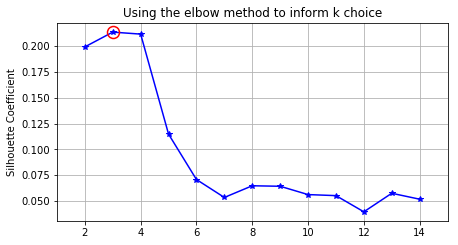

In [19]:
# What do these clusters look like?

silhouette_scores = [metrics.silhouette_score(no_name, e.labels_, metric='euclidean') for e in est[1:]]

silhouette_scores

# Plot the results
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to inform k choice')
plt.plot(k_rng[1:], silhouette_scores, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.plot(3,silhouette_scores[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

Now plot the clusters!

In [20]:
# Write code to plot the clusters
song_cluster = KMeans(n_clusters=3, init='random')
song_cluster.fit(no_name)
y_kmeans = song_cluster.predict(no_name)
song_cluster_labels = song_cluster.labels_
song_cluster_cluster_centers = song_cluster.cluster_centers_

In [21]:
for cluster_in_question in range(0,3):
    # get center of cluster
    "centroid", song_cluster.cluster_centers_[cluster_in_question]
    # grab songs in dataframe that belong to this cluster
    songs = df[np.where(y_kmeans == cluster_in_question, True, False)]['name']
    # look at top five qualities in cluster
    print (sorted(zip(df.columns[1:], song_cluster.cluster_centers_[cluster_in_question]), key=lambda x:x[1], reverse=True)[1:6])

[('extensive vamping', 0.29268292682926822), ('electric rock instrumentation', 0.2682926829268294), ('repetitive melodic phrasing', 0.23780487804878037), ('punk influences', 0.22560975609756106), ('acoustic rhythm guitars', 0.19512195121951204)]
[('electronica influences', 0.88235294117647034), ('consistent rhyme patterns', 0.82352941176470607), ('syncopated beats', 0.76470588235294101), ('hardcore rap influence', 0.64705882352941158), ('the use of chordal patterning', 0.58823529411764719)]
[('use of modal harmonies', 0.68518518518518523), ('synth riffs', 0.64814814814814792), ('prevalent use of groove', 0.592592592592593), ('a highly synthetic sonority', 0.59259259259259245), ('effected synths', 0.59259259259259245)]


In [22]:
plt.figure(figsize=(12, 6))
plt.suptitle('Songs', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[3]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

distance = euclidean_distances(k_means_3_cluster_centres,
                               squared=True)
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = k_means_3_labels == order[k]
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

IndexError: list index out of range

## 3. Cluster Validation

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics

np.random.seed(0)

'''
K = 2
'''

# Generate and Plot Dummy Data for k = 2
centres = [[2, 0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1))
labels_true = np.concatenate((labels0_true,labels1_true+1))
colors = np.array(['#FF0054','#FBD039'])
plt.figure(figsize=(12, 8))
plt.suptitle('Cluster Validation Evaluation', fontsize=15)
plt.subplot(331)
plt.text(-0.5, 1.5, 'k=2', fontsize=14)
for k, col in zip(range(2), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Data with truth labels')
plt.ylabel('y')


In [ ]:
# Calculate Silhouette Scores for different values of K, highlighting k = 2
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Silhouette Coefficient')
plt.plot(2,silhouette_score[0], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


Question: Do you think k=2 is a good value for the silhouette coefficient?

Yes, 2 clusters is the better number of clusters as it has the highest silhouette coefficient.

In [ ]:
# Calculate the within sum of squared errors for different values of K, highlighting k = 2
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Within Sum of Squared Errors')
plt.plot(2,within_sum_squares[1], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


Question: Do you think this is a good value for within sum of squares? If not, which value of k would be better?

Yes, this is the best value for within sum of squares; closely followed by 3 clusters.

### Now perform K-means clustering for K=3, and plot it. 

In [ ]:
'''
K = 3
'''

from sklearn.datasets.samples_generator import make_blobs

# Generate and Plot Dummy Data for k = 3
centres = [[2, 0.75], [1, -0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.text(-1, 1.5, 'k=3', fontsize=14)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.ylabel('y')

In [ ]:

# Calculate Silhouette Scores for different values of K, highlighting k = 3
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,silhouette_score[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

         

In [ ]:
# Calculate the within sum of squared errors for different values of K, highlighting k = 3
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


In [ ]:
# Generate and Plot Dummy Data for k = 5
centres = [[2, 0.75], [1, -0.75], [0, 0], [0.5, 1.5], [3, -0.5]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.2,0.2]])
X3, labels3_true = make_blobs(n_samples=300, centers=centres[3], cluster_std=[[0.2,0.2]])
X4, labels4_true = make_blobs(n_samples=300, centers=centres[4], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2,X3,X4))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2,
                              labels3_true+3,labels4_true+4))
colors = np.array(['#FF0054','#FBD039','#23C2BC', '#650A34', '#808080'])
plt.text(-1, 2, 'k=5', fontsize=14)
for k, col in zip(range(5), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# Calculate Silhouette Scores for different values of K, highlighting k = 5
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.plot(5,silhouette_score[3], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [ ]:
# Calculate the within sum of squared errors for different values of K, highlighting k = 5
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.plot(5,within_sum_squares[4], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

## 4. Kmeans Limitations

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/

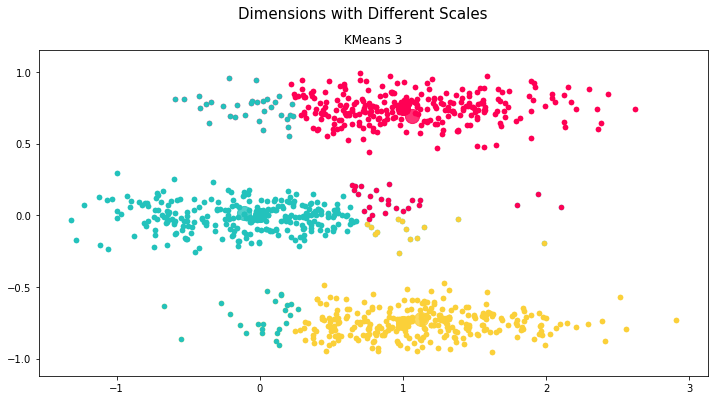

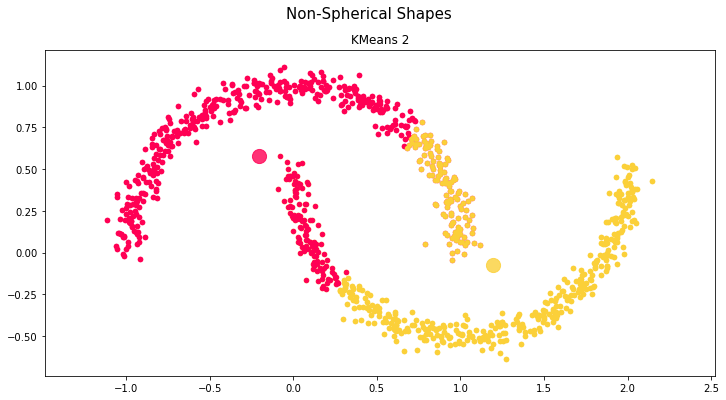

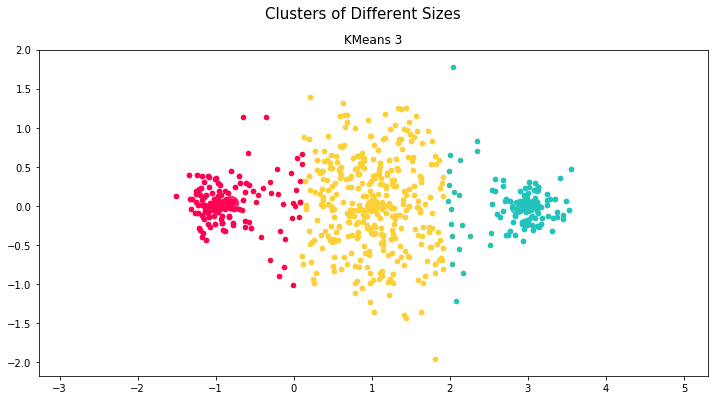

In [23]:
'''
NOTES ON LIMITATIONS OF K-MEANS CLUSTERING

Adapted from Bart Baddely's 2014 PyData Presentation:
http://nbviewer.ipython.org/github/BartBaddeley/PyDataTalk-2014/blob/master/PyDataTalk.ipynb

Agenda: 
1) K-means might not work when dimensions have different scales
2) K-means might not work for non-spherical shapes
3) K-means might not work for clusters of different sizes
'''

from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

'''
1) DIMENSIONS WITH DIFFERENT SCALES
'''

# Generate data with differing variances
np.random.seed(0)

centres = [[1, 0.75], [1, -0.75], [0, 0]]

X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.6,0.1]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.6,0.1]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.6,0.1]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

colors = np.array(['#FF0054','#FBD039','#23C2BC'])

plt.figure(figsize=(12, 6))
plt.suptitle('Dimensions with Different Scales', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres,
                               centres,
                               squared=True)
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = k_means_3_labels == order[k]
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

'''
#2: NON-SPHERICAL SHAPES
'''

[X, true_labels] = make_moons(n_samples=1000, noise=.05)

plt.figure(figsize=(12, 6))
plt.suptitle('Non-Spherical Shapes', fontsize=15)
for k, col in zip(range(2), colors):
    my_members = true_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o', s=20)

plt.axis('equal')
plt.title('Original Data') 
    
# Compute clustering with 2 Clusters
k_means_2 = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means_2.fit(X)
k_means_2_labels = k_means_2.labels_
k_means_2_cluster_centers = k_means_2.cluster_centers_

for k, col in zip(range(2), colors):           
    my_members = k_means_2_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)     
    cluster_center = k_means_2_cluster_centers[k]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8) 
plt.axis('equal')
plt.title('KMeans 2')

'''
#3: CLUSTERS OF DIFFERENT SIZES
'''

np.random.seed(0)

centres = [[-1, 0], [1, 0], [3, 0]]

X0, labels0_true = make_blobs(n_samples=100, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=400, centers=centres[1], cluster_std=[[0.6,0.6]])
X2, labels2_true = make_blobs(n_samples=100, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

plt.figure(figsize=(12, 6))
plt.suptitle('Clusters of Different Sizes', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres,
                               centres,
                               squared=True)
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = k_means_3_labels == order[k]
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

# 5. Apply DBSCAN

For the data sets generated in point 4, apply DBSCAN and plot the results to see how well it does on each set, compared to K-Means

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


In [24]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics
%matplotlib inline


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


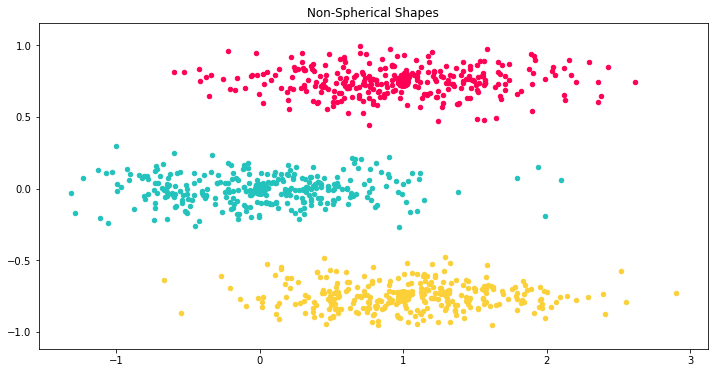

In [25]:
# Generate data with differing variances
np.random.seed(0)

centres = [[1, 0.75], [1, -0.75], [0, 0]]
colors = np.array(['#FF0054','#FBD039','#23C2BC'])

X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.6,0.1]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.6,0.1]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.6,0.1]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

colors = np.array(['#FF0054','#FBD039','#23C2BC'])

plt.figure(figsize=(12, 6))
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Non-Spherical Shapes')

Estimated number of clusters: 3
Homogeneity: 0.974
Completeness: 0.897
V-measure: 0.934
Adjusted Rand Index: 0.959
Adjusted Mutual Information: 0.897
Silhouette Coefficient: 0.460


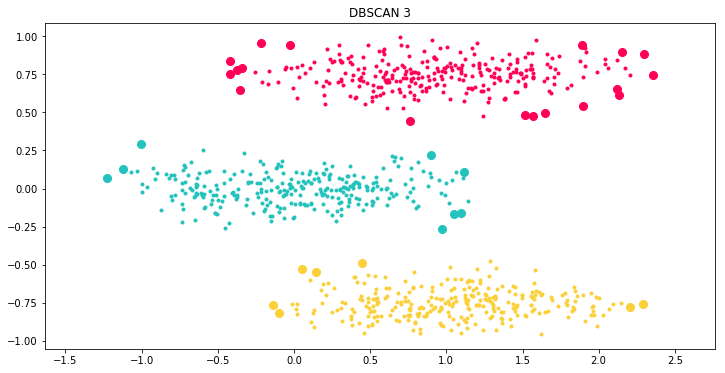

In [28]:
db = DBSCAN(eps=0.2, min_samples=10)
db.fit(X)
labels = db.labels_
dbcsi = db.core_sample_indices_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbcsi] = True

# Plot result
unique_labels = set(labels)
plt.figure(figsize=(12, 6))

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    plt.plot(X[class_member_mask & core_samples_mask, 0], X[class_member_mask & core_samples_mask, 1], 'o', marker='o', c=col, markersize=3)
    plt.plot(X[class_member_mask & ~core_samples_mask, 0], X[class_member_mask & ~core_samples_mask, 1], 'o', marker='o', c=col, markersize=8)     
plt.axis('equal')
plt.title('DBSCAN 3')


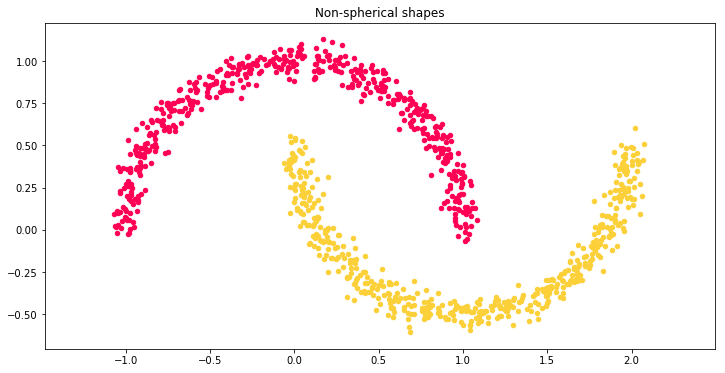

In [69]:
[X, true_labels] = make_moons(n_samples=1000, noise=.05)

plt.figure(figsize=(12, 6))
for k, col in zip(range(2), colors):
    my_members = true_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o', s=20)

plt.axis('equal')
plt.title('Non-spherical shapes') 

Estimated number of clusters: 2


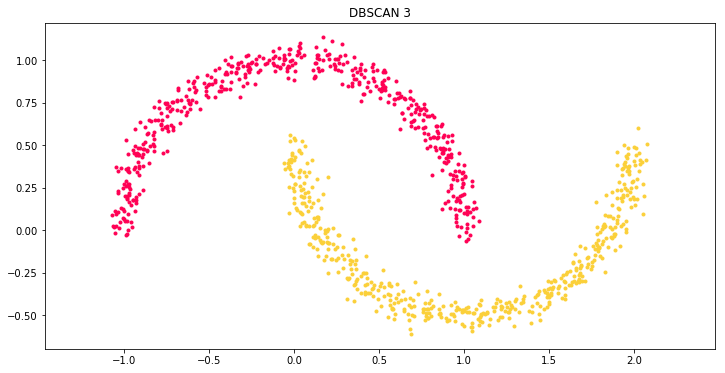

In [70]:
b = DBSCAN(eps=0.03, min_samples=100)
db.fit(X)
labels = db.labels_
dbcsi = db.core_sample_indices_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbcsi] = True

# Plot result
unique_labels = set(labels)
plt.figure(figsize=(12, 6))

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    plt.plot(X[class_member_mask & core_samples_mask, 0], X[class_member_mask & core_samples_mask, 1], 'o', marker='o', c=col, markersize=3)
    plt.plot(X[class_member_mask & ~core_samples_mask, 0], X[class_member_mask & ~core_samples_mask, 1], 'o', marker='o', c=col, markersize=10)     
plt.axis('equal')
plt.title('DBSCAN 3')

In [71]:
np.random.seed(0)

centres = [[-1, 0], [1, 0], [3, 0]]

X0, labels0_true = make_blobs(n_samples=100, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=400, centers=centres[1], cluster_std=[[0.6,0.6]])
X2, labels2_true = make_blobs(n_samples=100, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


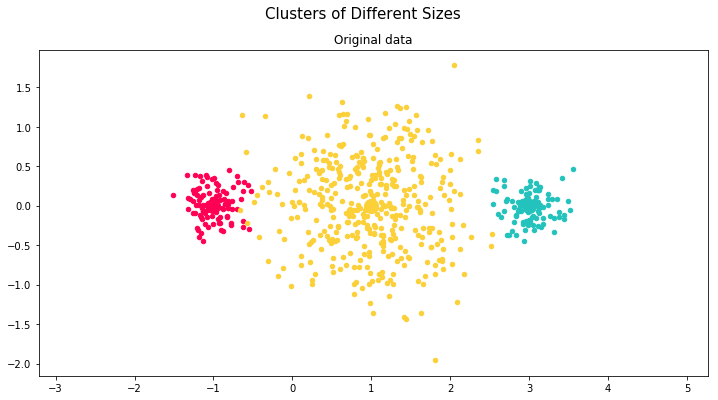

In [72]:
plt.figure(figsize=(12, 6))
plt.suptitle('Clusters of Different Sizes', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

Estimated number of clusters: 3
Homogeneity: 0.909
Completeness: 0.783
V-measure: 0.841
Adjusted Rand Index: 0.867
Adjusted Mutual Information: 0.781
Silhouette Coefficient: 0.497


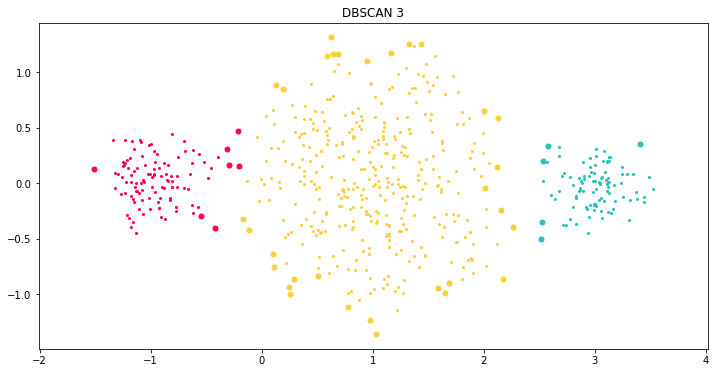

In [73]:
# Compute clustering with 3 Clusters
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)
labels = db.labels_
dbcsi = db.core_sample_indices_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbcsi] = True

# Plot result
unique_labels = set(labels)
plt.figure(figsize=(12, 6))

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    plt.plot(X[class_member_mask & core_samples_mask, 0], X[class_member_mask & core_samples_mask, 1], 'o', marker='o', c=col, markersize=2)
    plt.plot(X[class_member_mask & ~core_samples_mask, 0], X[class_member_mask & ~core_samples_mask, 1], 'o', marker='o', c=col, markersize=5)     
plt.axis('equal')
plt.title('DBSCAN 3')
